In [ ]:
from google.colab import files

uploaded = files.upload()



Saving customer_nodes_testing.p to customer_nodes_testing.p
Saving customer_nodes_training.p to customer_nodes_training.p
Saving event_table_testing.p to event_table_testing.p
Saving event_table_training.p to event_table_training.p
Saving product_nodes_testing.p to product_nodes_testing.p
Saving product_nodes_training.p to product_nodes_training.p


# New Section

In [ ]:
!pip install numpy==1.26.4 --quiet
import os
os.kill(os.getpid(), 9)  # This restarts the Colab runtime

In [ ]:
import pickle

# List of your file names
file_names = [
    "customer_nodes_testing.p",
    "customer_nodes_training.p",
    "event_table_testing.p",
    "event_table_training.p",
    "product_nodes_testing.p",
    "product_nodes_training.p"
]

# Dictionary to store loaded data
loaded_data = {}

# Load each file
for name in file_names:
    with open(name, "rb") as f:
        loaded_data[name] = pickle.load(f)

# Check what was loaded
for name, content in loaded_data.items():
    print(f"\n{name} - Type: {type(content)}")
    if hasattr(content, 'head'):
        print(content.head())  # If it's a DataFrame
    else:
        print(str(content)[:500])  # Preview first 500 characters


customer_nodes_testing.p - Type: <class 'pandas.core.frame.DataFrame'>
   hash(customerId)  yearOfBirth  isMale shippingCountry  premier  \
1       -1542001058         2004       1       Country_I        0   
2         828606281         2001       0       Country_G        0   
3         854915836         2002       0       Country_G        0   
4        1055535741         2002       0       Country_B        0   
5        -935211225         1987       0       Country_G        0   

   salesPerCustomer  returnsPerCustomer  customerReturnRate  \
1                 3                   2            0.666667   
2                17                   6            0.352941   
3                 7                   1            0.142857   
4                 2                   2            1.000000   
5                19                  10            0.526316   

   customerId_level_return_code_A  customerId_level_return_code_B  ...  \
1                        0.000000                           

In [ ]:
import os

# Create a folder to store the CSVs (optional)
os.makedirs("csv_outputs", exist_ok=True)

# Save each DataFrame as a CSV
for name, content in loaded_data.items():
    if hasattr(content, "to_csv"):
        csv_name = os.path.join("csv_outputs", name.replace(".p", ".csv"))
        content.to_csv(csv_name, index=False)
        print(f"Saved: {csv_name}")
    else:
        print(f"Skipped: {name} (not a DataFrame)")

Saved: csv_outputs/customer_nodes_testing.csv
Saved: csv_outputs/customer_nodes_training.csv
Saved: csv_outputs/event_table_testing.csv
Saved: csv_outputs/event_table_training.csv
Saved: csv_outputs/product_nodes_testing.csv
Saved: csv_outputs/product_nodes_training.csv


In [ ]:
from google.colab import files
import glob

# Download all CSVs from the folder
for file in glob.glob("csv_outputs/*.csv"):
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded_data = {}

for name in file_names:
    with open(name, "rb") as f:
        loaded_data[name] = pickle.load(f)

In [ ]:
for key in loaded_data:
    print(f"{key}: {type(loaded_data[key])}")

customer_nodes_testing.p: <class 'pandas.core.frame.DataFrame'>
customer_nodes_training.p: <class 'pandas.core.frame.DataFrame'>
event_table_testing.p: <class 'pandas.core.frame.DataFrame'>
event_table_training.p: <class 'pandas.core.frame.DataFrame'>
product_nodes_testing.p: <class 'pandas.core.frame.DataFrame'>
product_nodes_training.p: <class 'pandas.core.frame.DataFrame'>


In [ ]:
event_table = loaded_data["event_table_training.p"]
customer_nodes = loaded_data["customer_nodes_training.p"]
product_nodes = loaded_data["product_nodes_training.p"]

In [ ]:
print("Event Table Columns:", event_table.columns.tolist())
print("Customer Nodes Columns:", customer_nodes.columns.tolist())
print("Product Nodes Columns:", product_nodes.columns.tolist())

Event Table Columns: ['hash(variantID)', 'hash(customerId)', 'isReturned']
Customer Nodes Columns: ['hash(customerId)', 'yearOfBirth', 'isMale', 'shippingCountry', 'premier', 'salesPerCustomer', 'returnsPerCustomer', 'customerReturnRate', 'customerId_level_return_code_A', 'customerId_level_return_code_B', 'customerId_level_return_code_C', 'customerId_level_return_code_D', 'customerId_level_return_code_E', 'customerId_level_return_code_D', 'customerId_level_return_code_F', 'customerId_level_return_code_G', 'customerId_level_return_code_H', 'customerId_level_return_code_I', 'customerId_level_return_code_J', 'customerId_level_return_code_K', 'customerId_level_return_code_L', 'Country_A', 'Country_B', 'Country_C', 'Country_D', 'Country_E', 'Country_F', 'Country_G', 'Country_H', 'Country_I']
Product Nodes Columns: ['hash(variantID)', 'hash(productID)', 'productType', 'hash(supplierRef)', 'brandDesc', 'avgGbpPrice', 'avgDiscountValue', 'salesPerProduct', 'returnsPerProduct', 'productReturnRa

In [ ]:
merged_df = event_table.merge(customer_nodes, on='hash(customerId)') \
                       .merge(product_nodes, on='hash(variantID)')

In [ ]:
merged_df.rename(columns={
    'hash(customerId)': 'customer_id',
    'hash(variantID)': 'variant_id'
}, inplace=True)

In [ ]:
# Check the balance of returned vs. not returned
print(merged_df['isReturned'].value_counts())

# Quick look at correlations
print(merged_df.corr(numeric_only=True)['isReturned'].sort_values(ascending=False))

1    464466
0    383988
Name: isReturned, dtype: int64
isReturned                       1.000000
customerReturnRate               0.534717
productReturnRate                0.316291
returnsPerCustomer               0.205395
Country_E                        0.159774
                                   ...   
productType_I                   -0.069127
Country_G                       -0.101140
salesPerProduct                 -0.116282
productType_K                   -0.128342
variantID_level_return_code_K   -0.180967
Name: isReturned, Length: 72, dtype: float64


In [ ]:
import pandas as pd

In [ ]:
X = merged_df.drop(columns=['isReturned', 'hash(customerId)', 'hash(variantID)', 'hash(productID)', 'hash(supplierRef)'], errors='ignore')
X = pd.get_dummies(X, drop_first=True)
y = merged_df['isReturned']

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72     76720
           1       0.76      0.79      0.78     92971

    accuracy                           0.75    169691
   macro avg       0.75      0.75      0.75    169691
weighted avg       0.75      0.75      0.75    169691



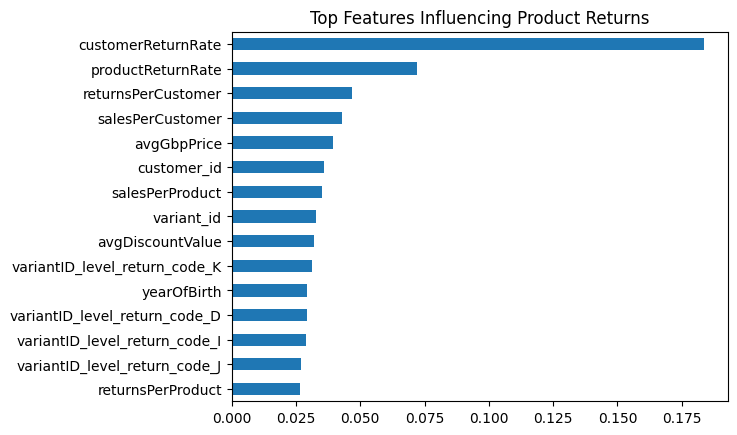

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

# Plot
top_features.plot(kind='barh')
plt.title('Top Features Influencing Product Returns')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Use a slightly larger sample for better learning, but still faster than full data
X_sample = X_train.sample(frac=0.5, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Optimized model configuration
model = RandomForestClassifier(
    n_estimators=40,       # Fewer trees for speed
    max_depth=12,          # Slightly deeper trees for better learning
    max_features='sqrt',   # Efficient feature selection at each split
    min_samples_leaf=5,    # Prevent overfitting on small splits
    n_jobs=-1,             # Use all CPU cores
    random_state=42
)

# Train the model
model.fit(X_sample, y_sample)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71     76720
           1       0.76      0.80      0.78     92971

    accuracy                           0.75    169691
   macro avg       0.75      0.74      0.74    169691
weighted avg       0.75      0.75      0.75    169691

